This idea is bad !

In [1]:
import numpy as np
import copy

from src.m03_some_mc import Mask_x0_x1, Reward, Get_pdf, Calculate_V, Plot_V

### 1 Define the world

In [2]:
dim0, dim1 = 3, 4

impenetrable_points = \
    [(-1,   d1  ) for d1 in range(dim1)] + \
    [(dim0, d1  ) for d1 in range(dim1)] + \
    [(d0  , -1  ) for d0 in range(dim0)] + \
    [(d0  , dim1) for d0 in range(dim0)] + \
    [(1,1)]

M = np.array([ [Mask_x0_x1(x=(x0,x1), D=impenetrable_points) for x1 in range(dim1)] for x0 in range(dim0) ])

R = np.array([  [Reward(x=(x0,x1)) for x1 in range(dim1)] for x0 in range(dim0) ])

### 2 Add noise

In [3]:
dimensions = dim0, dim1

hyperparameters = {
    'seed': 34,
    'destination': (0,3),
    'gam': 0.9,
    'beta': 0.05,
    'ep_noise': 0.04,
    'iterations': 10000
}


Lam, Lam_noise = Get_pdf(dimensions, hyperparameters, M, R)

In [4]:
V = Calculate_V(dimensions, hyperparameters['gam'], Lam_noise, M, R, 1000)

In [5]:
np.around(Lam_noise,2)

array([[[0.  , 0.07, 0.74, 0.  , 0.18],
        [0.  , 0.  , 0.9 , 0.04, 0.06],
        [0.  , 0.14, 0.49, 0.09, 0.29],
        [0.  , 0.33, 0.  , 0.33, 0.33]],

       [[0.68, 0.21, 0.  , 0.  , 0.1 ],
        [0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.74, 0.03, 0.03, 0.  , 0.19],
        [0.25, 0.25, 0.  , 0.25, 0.25]],

       [[0.34, 0.  , 0.55, 0.  , 0.11],
        [0.  , 0.  , 0.82, 0.08, 0.1 ],
        [0.8 , 0.  , 0.06, 0.04, 0.09],
        [0.04, 0.  , 0.  , 0.84, 0.12]]])

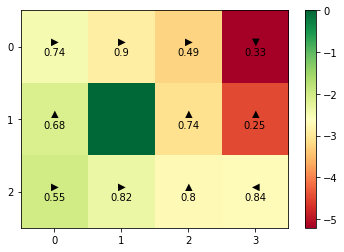

In [6]:
Plot_V((V), Lam_noise, impenetrable_points)